Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline 

In [ ]:
DATA_FOLDER = 'all/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [92]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [ ]:
transactions["date"] = pd.to_datetime(transactions.date,format=  "%d.%m.%Y")

In [91]:
transactions["revenue"] = transactions.item_price*transactions.item_cnt_day

In [95]:
a = transactions.loc[[dt.year == 2014 and dt.month == 9 for dt in transactions.date]].groupby("shop_id")

In [ ]:
b =transactions.loc[[dt.year == 2014 and dt.month == 9 for dt in transactions.date]]

In [122]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [123]:
shops.iloc[np.argmax(b.sum())]

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


shop_name    Москва ТЦ "Семеновский"
shop_id                           31
Name: 31, dtype: object

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [ ]:
transactions.head()

In [140]:
transactions_r = transactions.loc[(transactions["date"].dt.year == 2014) & (transactions["date"].dt.month >= 6)
                                 & (transactions["date"].dt.month < 9)]

In [ ]:
transactions_j = pd.merge(transactions_r,items,on = "item_id")

In [ ]:
a = transactions_j.groupby("item_category_id")["revenue"].sum()

In [167]:
a.max()

32157302.430000115

In [155]:
transactions_j

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_name,item_category_id
0,2014-06-15,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-03,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
2,2014-06-08,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
3,2014-06-11,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,2014-06-19,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
5,2014-06-20,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
6,2014-06-17,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
7,2014-06-21,17,27,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
8,2014-06-28,17,27,9532,399.00,3.0,1197.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
9,2014-06-02,17,27,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [142]:
transactions_r.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1705909,2014-06-15,17,26,9532,399.00,1.0,399.00
1705910,2014-06-10,17,26,9507,149.00,1.0,149.00
1705911,2014-06-13,17,26,9509,246.32,1.0,246.32
1705912,2014-06-03,17,26,9532,399.00,1.0,399.00
1705913,2014-06-08,17,26,9532,399.00,1.0,399.00


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [179]:
transactions.groupby("item_id")["item_price"].get_group(1)

1552550    4490.0
1552605    4490.0
1815470    4490.0
1906681    4490.0
2021246    4490.0
2069410    4490.0
Name: item_price, dtype: float64

In [190]:
transactions.groupby("item_id")["item_price"].nunique()

item_id
0         1
1         1
2         1
3         2
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27       11
28       11
29        6
         ..
22140    41
22141     2
22142     1
22143     3
22144     4
22145     6
22146     6
22147     6
22148     1
22149     4
22150     6
22151     5
22152     2
22153     8
22154     3
22155     8
22156     1
22157     3
22158     1
22159     1
22160     4
22161     1
22162    10
22163     4
22164    11
22165     1
22166     1
22167     8
22168     2
22169     1
Name: item_price, Length: 21807, dtype: int64

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [ ]:
transactions_d = transactions.loc[(transactions.date.dt.year == 2014) & (transactions.date.dt.month ==9)]

In [ ]:
a = transactions_d.groupby("shop_id").get_group(25).groupby("date")["item_cnt_day"].sum().reset_index("ok")

In [215]:
a.reset_index(name="ok")

,date,ok
0,2014-09-01,146.0
1,2014-09-02,92.0
2,2014-09-03,112.0
3,2014-09-04,190.0
4,2014-09-05,252.0
5,2014-09-06,215.0
6,2014-09-07,185.0
7,2014-09-08,155.0
8,2014-09-09,190.0
9,2014-09-10,172.0


In [214]:
a

date
2014-09-01    146.0
2014-09-02     92.0
2014-09-03    112.0
2014-09-04    190.0
2014-09-05    252.0
2014-09-06    215.0
2014-09-07    185.0
2014-09-08    155.0
2014-09-09    190.0
2014-09-10    172.0
2014-09-11    227.0
2014-09-12    235.0
2014-09-13    264.0
2014-09-14    182.0
2014-09-15    204.0
2014-09-16    175.0
2014-09-17    144.0
2014-09-18    160.0
2014-09-19    228.0
2014-09-20    312.0
2014-09-21    175.0
2014-09-22    142.0
2014-09-23    170.0
2014-09-24    203.0
2014-09-25    324.0
2014-09-26    382.0
2014-09-27    316.0
2014-09-28    249.0
2014-09-29    176.0
2014-09-30    181.0
Name: item_cnt_day, dtype: float64

In [ ]:
shop_id = 25

total_num_items_sold = a.values
days = a.index

In [209]:
a.var(ddof=F)

4097.528888888889

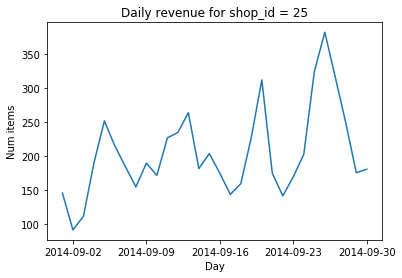

In [204]:
# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

In [203]:
total_num_items_sold_var = # PUT YOUR ANSWER IN THIS VARIABLE

SyntaxError: invalid syntax (<ipython-input-203-1f4b212734e4>, line 8)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [ ]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)